In [3]:
import psycopg2
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn = psycopg2.connect(dbname='therapist_predictor', user='postgres', host='localhost', password='password')

In [5]:
sql = "select * from therapists;"
sql_age = 'SELECT * FROM age_groups;'
sql_issues = 'SELECT  * FROM issues;'
sql_orientations = 'SELECT * FROM orientations'
sql_professions = 'SELECT * FROM professions'
sql_services = 'SELECT * FROM services'

df = pd.read_sql_query(sql, conn)
df_age_groups = pd.read_sql_query(sql_age, conn)
df_issues = pd.read_sql_query(sql_issues, conn)
df_orientations = pd.read_sql_query(sql_orientations, conn)
df_professions = pd.read_sql_query(sql_professions, conn)
df_services = pd.read_sql_query(sql_services, conn)

conn = None
df.head()

,therapist_id,first_name,last_name,street,primary_credential,license_status,website,info_source,creation_date,verified,...,years_in_practice,school,year_graduated,writing_sample,full_name,html_source_code,phone,state,city,zip_code
0,82,Bernadine,Merker,7000 E Belleview Ave Ste 350,Licensed Clinical Social Worker - CSW00992525,I'm a licensed professional.,http:www.merkercounseling.com,goodtherapy,2020-05-12 19:18:03.962988,True,...,None,None,None,I have a masters degree in both Education and ...,Bernadine Merker,None,303-770-0940,Colorado,Greenwood Village,80111
1,8,Jennifer,Adams,950 South Cherry Street,Psychologist - 3123,I'm a licensed professional.,http://www.bloomhealthdenver.com/,goodtherapy,2020-05-12 00:26:43.288912,True,...,None,None,None,~Are you hoping to become a mother but are hav...,Jennifer Harned Adams,None,303-325-1633,Colorado,Denver,80206
2,9,Eric,Eichler,1155 Sherman St,LCSW - CSW.09925366,I'm a licensed professional.,http://www.edgepsychotherapy.com,goodtherapy,2020-05-12 00:29:44.939505,True,...,None,None,None,Are you struggling with aligning your life act...,Eric Eichler,None,720-753-5801,Colorado,Denver,80203
3,83,Angie,Douglas,"12157 W.Cedar Dr, Ste 200",LPC - 0013676,I'm a licensed professional.,None,goodtherapy,2020-05-12 19:18:06.295429,True,...,None,None,None,You are unique and deserve to learn in the sty...,Angie Douglas,None,720-419-1693,Colorado,Lakewood,80228
4,84,Jessica,Dolgan,1756 High Street,None,I'm a licensed professional.,http:TherapyWithITS.com,goodtherapy,2020-05-12 19:18:09.370975,False,...,None,None,None,PHILOSOPHY:\r We're a practice dedicated to se...,Jessica Dolgan,None,303-388-8144,Colorado,Denver,80218


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 22 columns):
therapist_id          273 non-null int64
first_name            273 non-null object
last_name             273 non-null object
street                237 non-null object
primary_credential    266 non-null object
license_status        273 non-null object
website               273 non-null object
info_source           273 non-null object
creation_date         273 non-null datetime64[ns]
verified              273 non-null bool
license_num           0 non-null object
license_state         0 non-null object
years_in_practice     0 non-null object
school                0 non-null object
year_graduated        0 non-null object
writing_sample        273 non-null object
full_name             273 non-null object
html_source_code      0 non-null object
phone                 272 non-null object
state                 273 non-null object
city                  273 non-null object
zip_code            

In [17]:
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['figure.figsize'] = [10,6]

seven_colors = ['#001d8f','#774cb2','#bf84d6','#ffc3ff','#f995cd','#ed6892','#d43d51']

five_colors_purp_red = ['#001d8f','#9c67c4','#ffc3ff','#f47fb0','#d43d51']

five_colors_blue_red = ['#0ca7c9','#9ebdf3','#f6d5ff','#ee8ab8','#d43d51']

five_dark_blue_yellow = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

asd = ['#6ca3bd','#afbcea','#ffd2ff','#f288b4','#d43d51']

five_green_red = ['#13bdb4',
'#80d090',
'#dad977',
'#e49046',
'#d43d51']

palette = five_green_red
plt.rcParams.keys()

/home/cgridley/anaconda3/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

<BarContainer object of 5 artists>

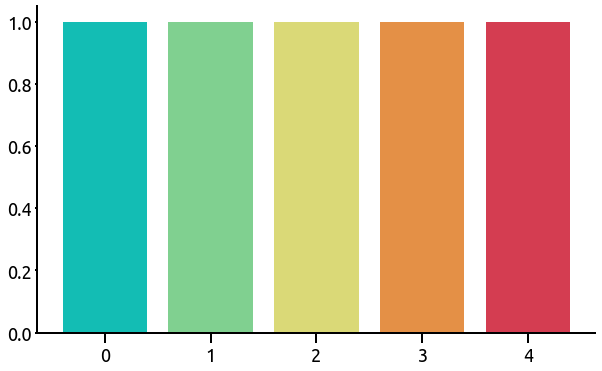

In [18]:
fig, axes = plt.subplots()
heights = np.ones(len(palette))
labels = [i for i in range(len(palette))]
c = [c for c in palette]
axes.bar(height=heights, x=labels, color=c)

In [19]:
writing_lengths = []
for body in df['writing_sample']:
    writing_lengths.append(len(body))
    
writing_lengths.sort()
writing_lengths

[187,
 205,
 241,
 248,
 273,
 322,
 440,
 460,
 460,
 491,
 518,
 536,
 563,
 577,
 593,
 619,
 653,
 681,
 682,
 682,
 703,
 738,
 794,
 795,
 800,
 807,
 809,
 810,
 817,
 879,
 885,
 898,
 905,
 905,
 908,
 911,
 913,
 918,
 927,
 958,
 961,
 979,
 987,
 994,
 1011,
 1012,
 1015,
 1016,
 1040,
 1041,
 1059,
 1060,
 1069,
 1100,
 1123,
 1124,
 1130,
 1132,
 1144,
 1144,
 1176,
 1191,
 1202,
 1205,
 1206,
 1216,
 1224,
 1226,
 1228,
 1229,
 1230,
 1242,
 1244,
 1248,
 1250,
 1273,
 1283,
 1284,
 1299,
 1315,
 1330,
 1340,
 1350,
 1358,
 1374,
 1385,
 1398,
 1401,
 1405,
 1406,
 1406,
 1419,
 1431,
 1440,
 1448,
 1452,
 1468,
 1472,
 1482,
 1487,
 1489,
 1489,
 1490,
 1493,
 1498,
 1527,
 1533,
 1536,
 1542,
 1562,
 1563,
 1572,
 1576,
 1577,
 1582,
 1589,
 1613,
 1616,
 1619,
 1621,
 1627,
 1636,
 1636,
 1641,
 1649,
 1652,
 1654,
 1681,
 1686,
 1691,
 1691,
 1699,
 1699,
 1723,
 1726,
 1733,
 1738,
 1754,
 1768,
 1769,
 1770,
 1784,
 1794,
 1798,
 1802,
 1810,
 1815,
 1820,
 1842,
 

In [20]:
print(f'Writing Length Range\nShortest description: {np.min(writing_lengths)} - Longest description: {np.max(writing_lengths)}')

Writing Length Range
Shortest description: 187 - Longest description: 15346


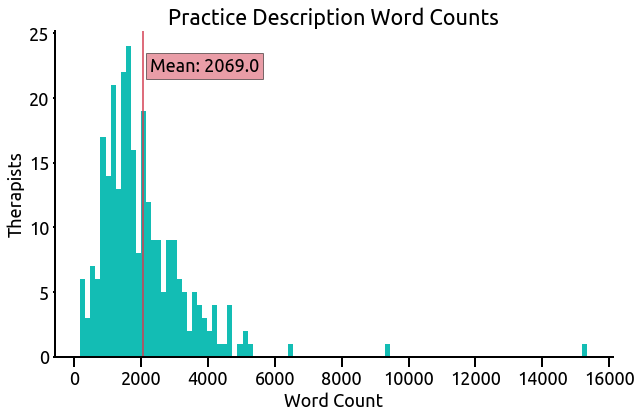

In [21]:
mean = np.mean(writing_lengths)
mean_label = f'Mean: {np.around(mean, decimals=0)}'
c1 = palette[0]
c2 = palette[4]
fig, ax = plt.subplots()
ax.set_xlabel('Word Count')
ax.set_ylabel('Therapists')
ax.set_title('Practice Description Word Counts')
ax.hist(writing_lengths, bins=100, color=c1)
ax.axvline(x=mean, c=c2)
plt.text(mean+200, 22, mean_label, bbox=dict(facecolor=c2, alpha=0.5))
plt.savefig('../img/word_count_hist.png')
plt.show()

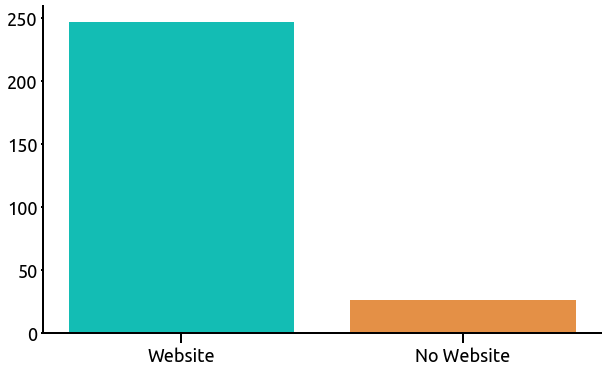

In [22]:
mask_no_website = df['website']=='None'
height = [df[~mask_no_website]['website'].size, df[mask_no_website]['website'].size]
labels = ['Website', 'No Website']

c = [palette[0], palette[3]]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(labels, height, color=c)
plt.savefig('../img/website_bar.png')
plt.show()

In [23]:
# number of unique values per category
age_groups_unique_size = df_age_groups['age_group'].unique().size
issues_unique_size = df_issues['issue'].unique().size
orientations_unique_size = df_orientations['orientation'].unique().size
professions_unique_size = df_professions['profession'].unique().size
service_unique_size = df_services['service'].unique().size

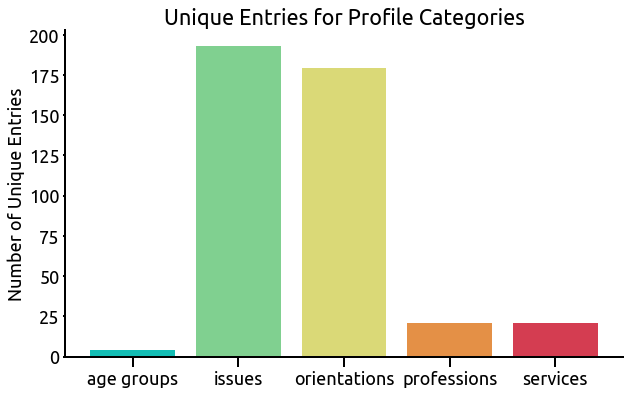

In [28]:
heights = [age_groups_unique_size, issues_unique_size, orientations_unique_size,
           professions_unique_size, service_unique_size]
labels = ['age groups', 'issues', 'orientations', 'professions', 'services']
colors = [palette[i] for i in range(len(heights))]

fig, ax = plt.subplots()
ax.set_title('Unique Entries for Profile Categories')
ax.set_ylabel('Number of Unique Entries')
ax.bar(height = heights, x=labels, color=colors)
plt.savefig('../img/uniques_per_category.png')
plt.show()

In [29]:
# Avg category per therapist

In [30]:
len(df['primary_credential'].unique())

203

In [31]:
creds = df['primary_credential'].unique()
#creds.sort()
for c in creds:
    print(c)

Licensed Clinical Social Worker - CSW00992525
Psychologist - 3123 
LCSW - CSW.09925366 
LPC - 0013676
None
LMFT
Licensed Professional Counselor Candidate - 08122023
Licensed Professional Counselor
Licensed Clinical Social Worker - 992133
Licensed Professional Counselor - 0015347
Licensed Professional Counselor - LPC-4858
Registered NLC CO
Registered Psychotherapist
Marriage and Family Therapist Candidate
Licensed Professional Counselor - LPC.0015594
LMFT - 0001420
Licensed Social Worker - LSW.0009922613
Clinical Psychologist
LPCC - LPCC.0014990
Licensed Professional Counselor - LPC.0016002
LPC
LPCC
LPC - LPC.0012737
LCSW - 1276
Licensed Professional Counselor Candidate - LPCC.0015516
Licensed Professional Counselor - 4518
MAMFT and Certified Play Therapist - #103286
Licensed Marriage & Family Therapist - 0001295
Professional Counselor - 0014629
Psychologist - PSY.0002890
LPC - 5592
Licensed Professional Counselor (LPC) - 0013388
Psychologist
Psychologist - 3279
Licensed Marriage and Fa